Accuracy: 92.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



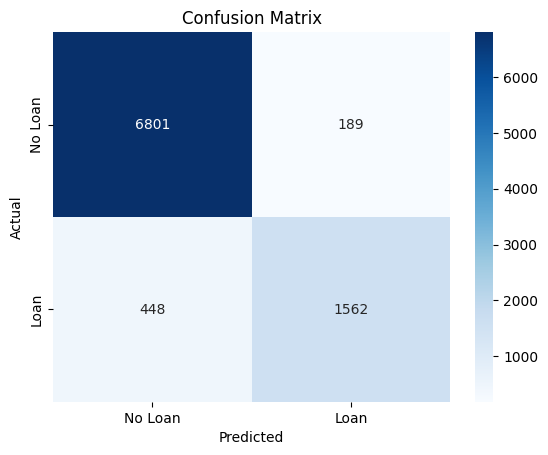

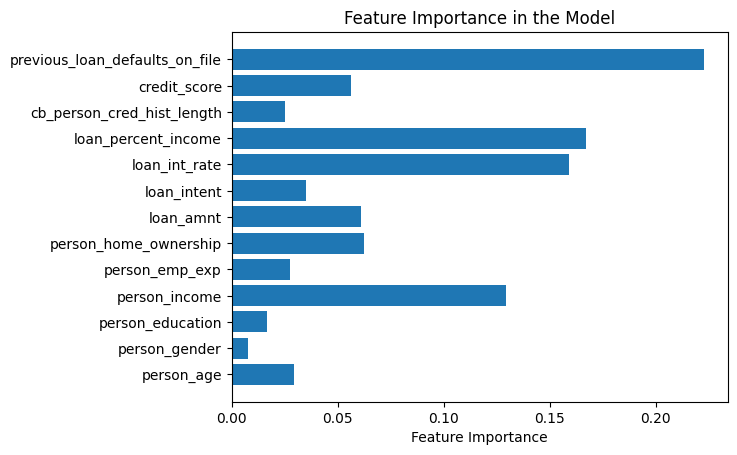

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from a CSV file
data = pd.read_csv('loan_data.csv')

# Displaying the first few rows of the data
data.head()

# Preprocessing the data
# Encoding categorical features using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']

# Applying label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separating the features (X) and target (y)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Model')
plt.show()


Epoch 1/30


/Users/samenergy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.7792 - loss: 0.6612 - val_accuracy: 0.8774 - val_loss: 0.3287
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8639 - loss: 0.3404 - val_accuracy: 0.8839 - val_loss: 0.3048
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8727 - loss: 0.3201 - val_accuracy: 0.8668 - val_loss: 0.3099
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8745 - loss: 0.3102 - val_accuracy: 0.8866 - val_loss: 0.2889
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8728 - loss: 0.3102 - val_accuracy: 0.8848 - val_loss: 0.2862
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8728 - loss: 0.3051 - val_accuracy: 0.8829 - val_loss: 0.2869
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8779 - loss: 0.2948 - val_accuracy: 0.8851 - val_loss: 0.2803
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8764 - loss: 0.29

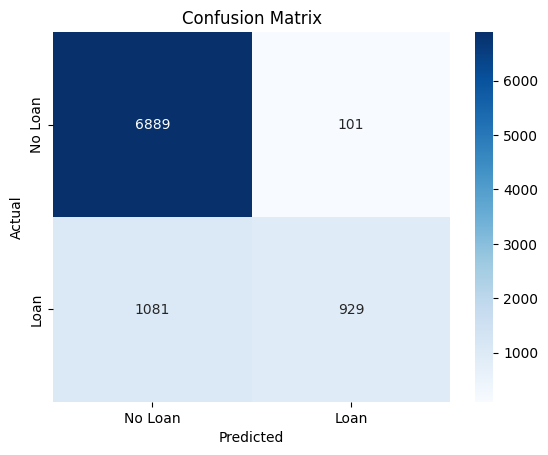

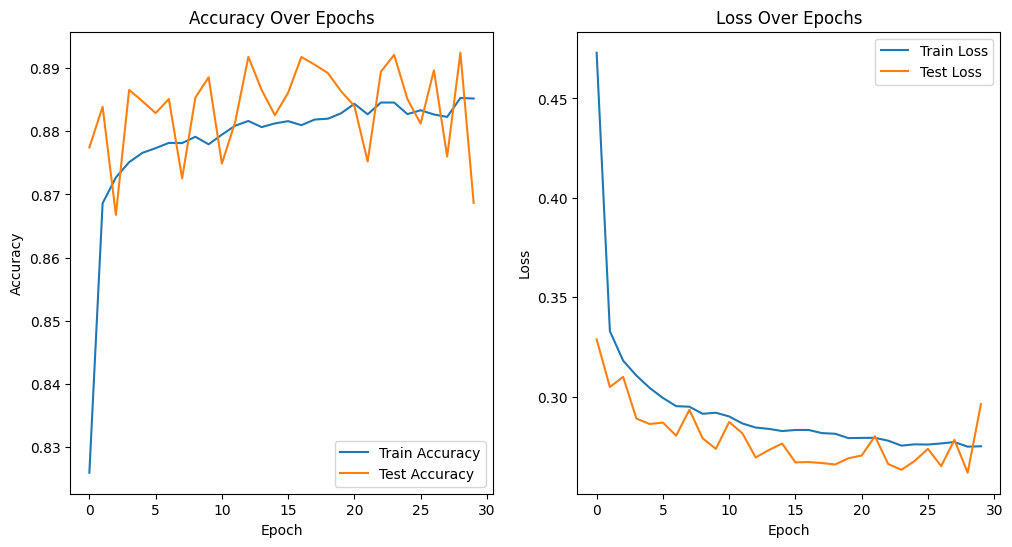

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from a CSV file
data = pd.read_csv('loan_data.csv')

# Displaying the first few rows of the data
data.head()

# Preprocessing the data
# Encoding categorical features using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']

# Applying label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separating the features (X) and target (y)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features to ensure better convergence during training
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# Building the neural network model
model = tf.keras.Sequential()

# Adding input layer and first hidden layer with L2 regularization and dropout
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Adding second hidden layer with L2 regularization and dropout
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (loan approval)

# Compiling the model with the Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Making predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
